<a href="https://colab.research.google.com/github/eduardosaldaren/datasciencedemo/blob/main/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Laboratory

In [1]:
!pip install numpy
!pip install pandas

### Part 1

In [2]:
import numpy as np
import pandas as pd



### Part 2

In [3]:
data = [[3,4,5,],
        [6,9,8],
        [10,12,20]]

columns = ['year 1', 'year 2', 'year 3']

db = pd.DataFrame (data = data, columns = columns)

In [4]:
print(db)

   year 1  year 2  year 3
0       3       4       5
1       6       9       8
2      10      12      20


## Part 3

In [5]:
path = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"

db_covid = pd.read_csv (path)
print(db_covid.head(10))

         date       state  fips  cases  deaths
0  2020-01-21  Washington    53      1       0
1  2020-01-22  Washington    53      1       0
2  2020-01-23  Washington    53      1       0
3  2020-01-24    Illinois    17      1       0
4  2020-01-24  Washington    53      1       0
5  2020-01-25  California     6      1       0
6  2020-01-25    Illinois    17      1       0
7  2020-01-25  Washington    53      1       0
8  2020-01-26     Arizona     4      1       0
9  2020-01-26  California     6      2       0


In [6]:
db_covid.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [7]:
deaths = db_covid['deaths'].sum()
print(f'number of deaths in US {deaths}')

number of deaths in US 729618999


In [8]:
deaths_by_state = db_covid[['state','cases','deaths']].groupby (by = ['state']).sum().sort_values (by = 'deaths', ascending = False).head(10).reset_index()
print(deaths_by_state)

          state       cases    deaths
0    California  6315141921  67503932
1         Texas  4640982014  62871518
2      New York  3481460364  59061061
3       Florida  4065043272  52694427
4  Pennsylvania  1884002397  32653246
5      Illinois  2184024652  28833752
6    New Jersey  1577338492  28482863
7      Michigan  1601347249  26110438
8       Georgia  1694478089  25872159
9          Ohio  1813202197  25744838


## Analysis

<Axes: xlabel='cases', ylabel='deaths'>

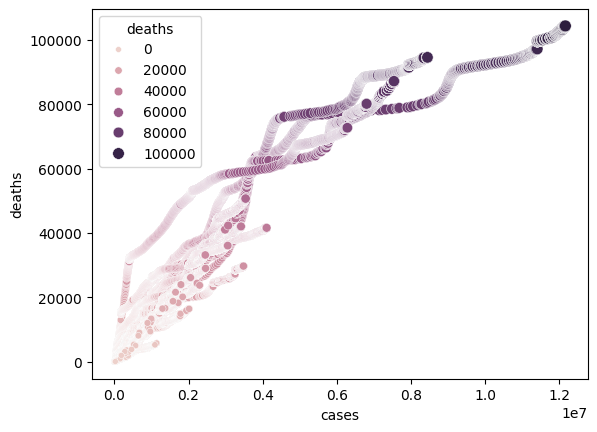

In [9]:
import seaborn as sns
sns.scatterplot (x = 'cases', y = 'deaths', hue = 'deaths', size = 'deaths', data = db_covid)

## Advanced Analysis

<Figure size 1500x500 with 0 Axes>

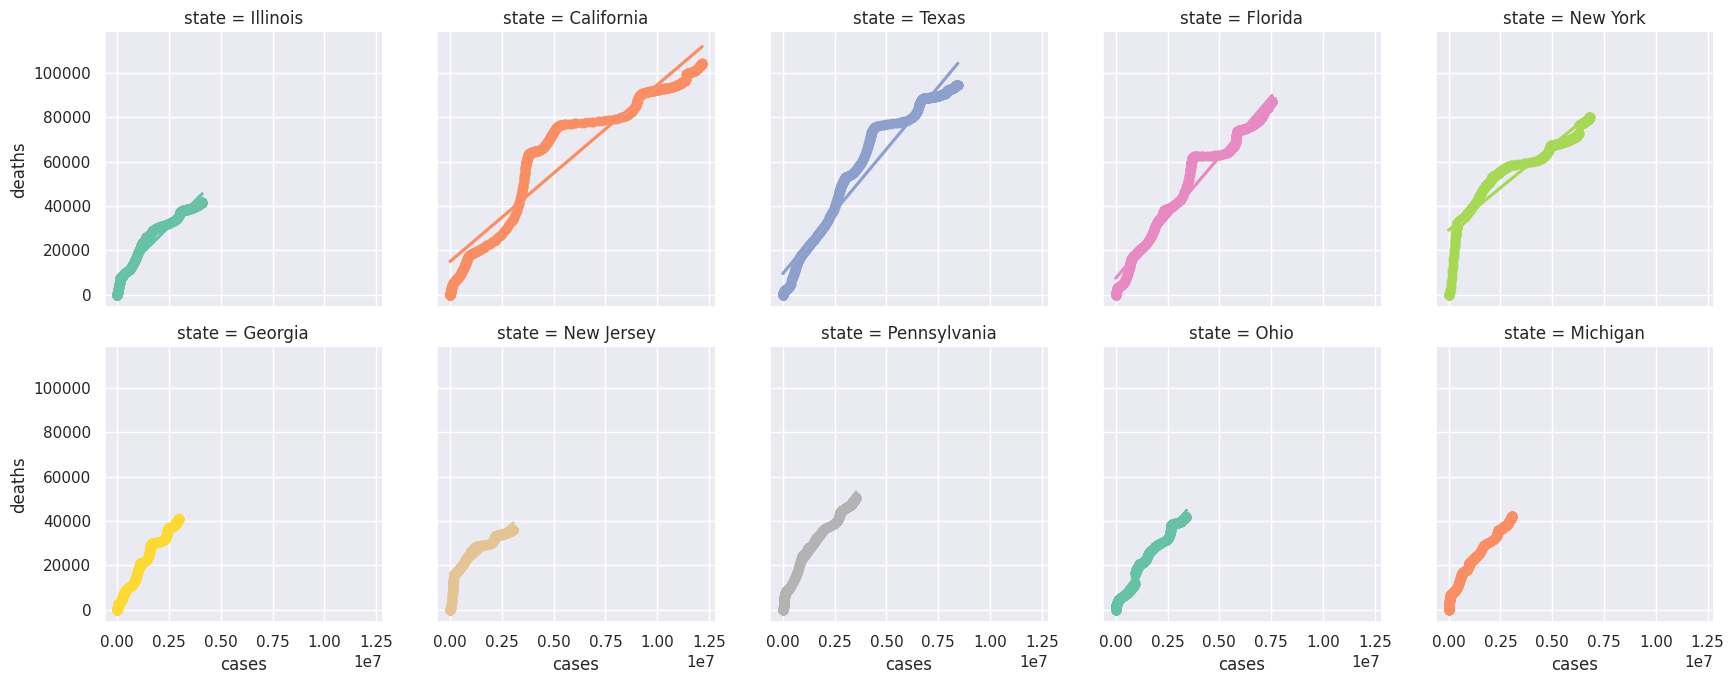

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure (figsize=(15,5))

states = deaths_by_state['state'].to_list()
cond = ''
for i in range(len(states)):
  cond += "state == '" + states[i] + "'"
  if i != len(states) - 1:
    cond += " | "
#print(cond)

db_top_states = db_covid.query (cond)

ax = sns.lmplot(x = 'cases', y = 'deaths',
                height = 3.5,
                col = 'state',
                col_wrap=5,
                hue = 'state',
                palette = 'Set2',
                data = db_top_states,
                )

ax.fig.subplots_adjust(wspace = 0.2)

## Deep Assessment

<Axes: xlabel='cases', ylabel='deaths'>

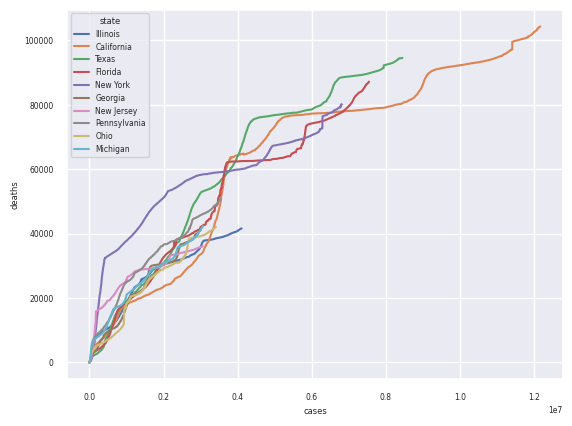

In [24]:
sns.set_theme (style = "darkgrid")
sns.set(font_scale=0.5)
sns.lineplot(x="cases", y="deaths",
             hue="state",
             data=db_top_states)

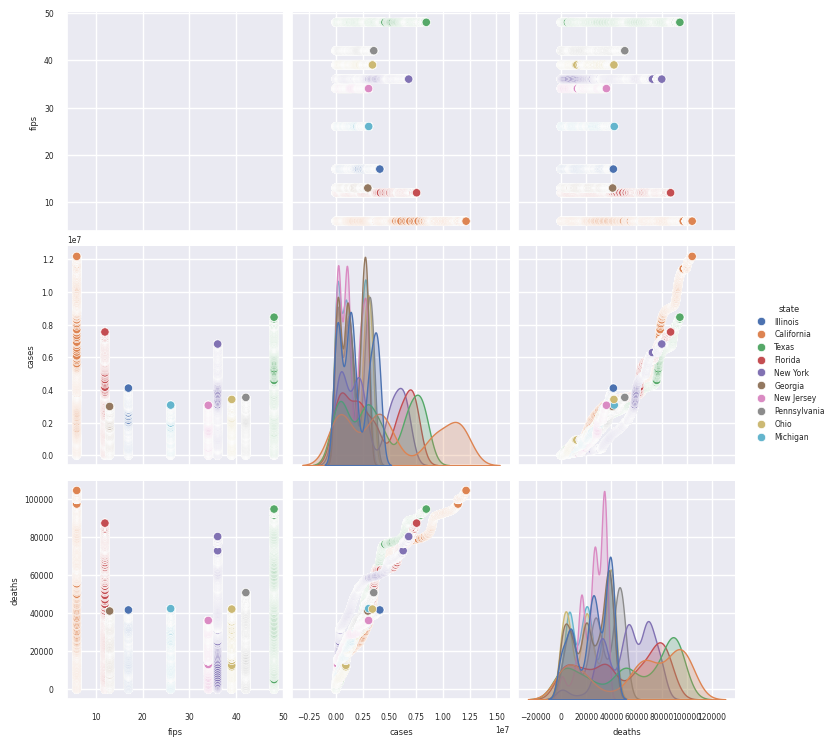

In [25]:
sns.set(font_scale=0.5)
sns.pairplot(data=db_top_states, hue = "state")